In [1]:
# import packages
import re,os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import clear_output
tfk = tf.keras
tfkl = tf.keras.layers
clear_output()
# import my files
from MRA_generate import MRA_generate
from symae_model import SymAE
from parameters import *
from plot_training import plot_training
from plot_redatuming import plot_redatuming
from plot_save import plot_save
from CustomCallback import CustomCallback
from redatuming import redatuming

Num GPUs Available:  2
TensorFlow Version:  2.9.1


In [15]:
# Initialize SymAE
model=SymAE(N,nt,d,p,q,kernel_size,filters)
model.compile(optimizer='adam', loss='mse')
model.load_weights('./checkpoints/')
clear_output()

In [16]:
# Generate the Dataset
MRA_data=MRA_generate(d,nt,N,sigma,ne)
X=MRA_data.generate_trigonometric()

In [11]:
# Train the NeuralNet
history=model.fit(X,X,epochs=200,verbose=0,callbacks=[CustomCallback()])

For epoch 19, loss is 0.024190.


1/1 [==============================] - 0s 498ms/step


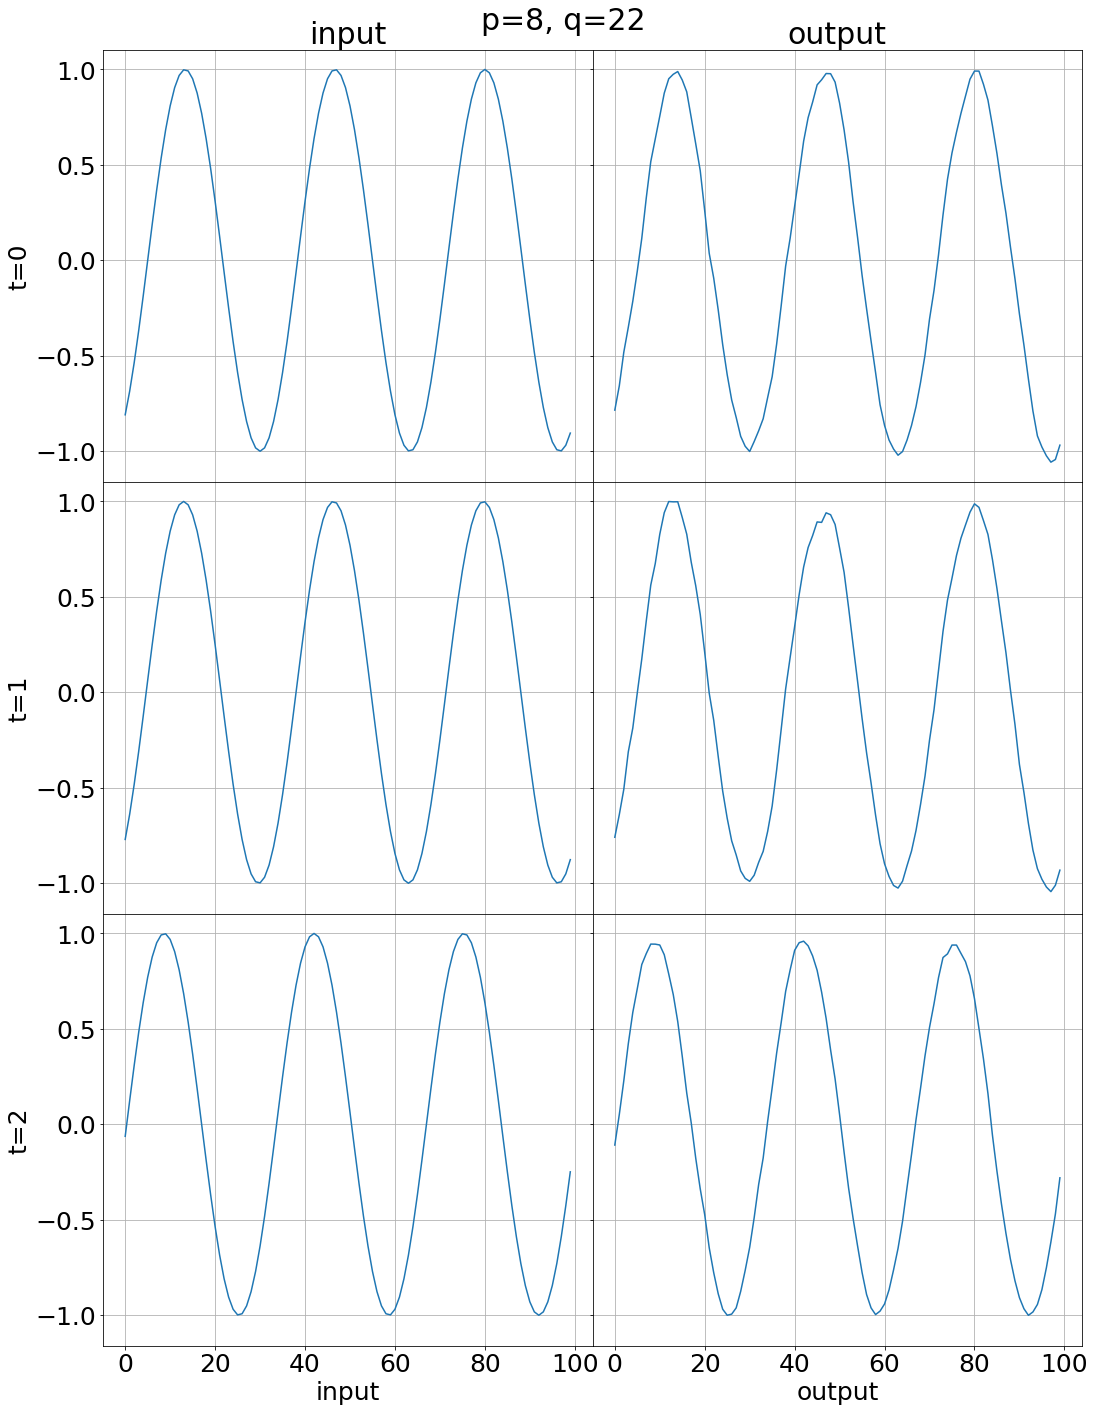

In [17]:
# Plot the result
MRA_data=MRA_generate(d,nt,1,sigma,ne)
test_X=MRA_data.generate_trigonometric()
fig=plot_training(model,test_X)

In [18]:
# Save plot
plot_save(fig,ID=1)

plot_1.png already exist
Saved as plot_0.png


In [19]:
# Save weights
model.save_weights('./checkpoints/')

The MSE of C1N2 is: 0.902994
The MSE of C2N1 is: 0.999346


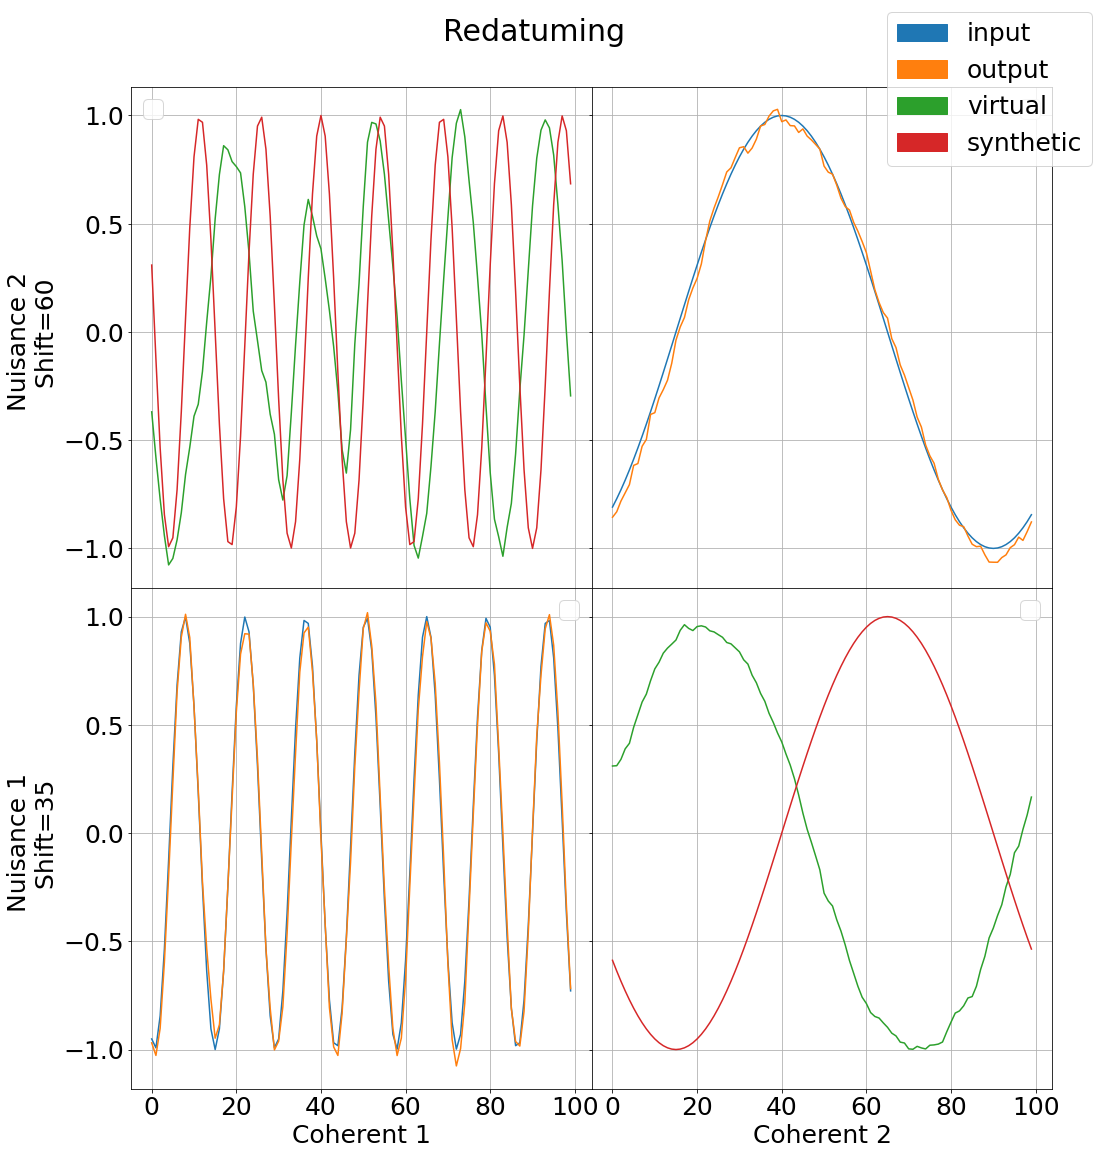

In [20]:
# Redatuming
MRA1=MRA_generate(d,nt,1,0,ne)
MRA1.generate_trigonometric()
MRA2=MRA_generate(d,nt,1,0,ne)
MRA2.generate_trigonometric()
t=1
redatum=redatuming(model,MRA1,MRA2,t)
MSE_C1_N2,MSE_C2_N1=redatum.MSE()
fig=plot_redatuming(redatum)
clear_output()
print('The MSE of C1N2 is: %f'%MSE_C1_N2)
print('The MSE of C2N1 is: %f'%MSE_C2_N1)

In [21]:
# Save plot
plot_save(fig,ID=2)

plot_2.png already exist
Saved as plot_0.png
